In [178]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Clustering based on Temperature and pH

In [179]:
raw_df = pd.read_csv('results-for-matlab.csv')
raw_df.shape, raw_df.columns 

((34, 44),
 Index(['species', 'Temp', 'pH', 'Kcat', 'Km', 'Vmax', 'logkm', 'logKcat',
        '-logKcat', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
        'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
        'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
        'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
        'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
        'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
        'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
        'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
        'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43'],
       dtype='object'))

In [180]:
working_df = raw_df[['Temp','pH']]
working_df.head()

,Temp,pH
0,8,8.08
1,4,7.89
2,4,7.77
3,8,7.89
4,8,7.66


In [181]:
inertia = []
max_cluster = 8
for n in range(2,max_cluster):
    km = KMeans(n_clusters=n)
    km.fit(working_df)
    inertia.append(km.inertia_)
    

## Elbow mwthod
to find the optimum number of clusters(n), serveral n is tested and the errors are plotted. The point that the graph forms an elbow is the optimum number of cluser. in this case 3 or 4 

Text(0, 0.5, 'Error')

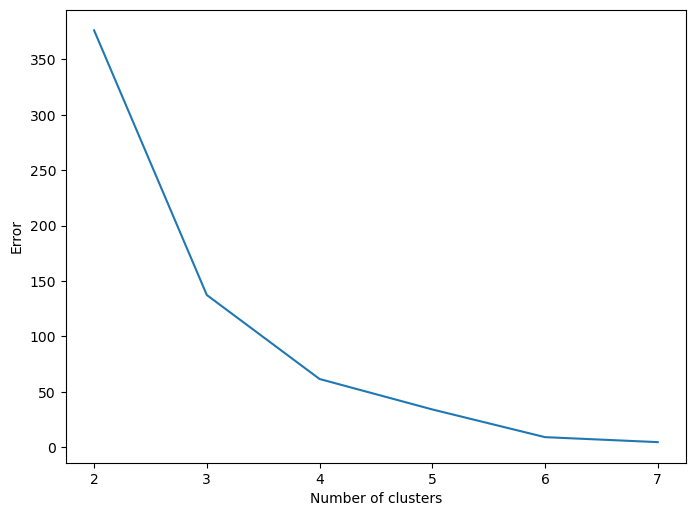

In [182]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(list(range(2,max_cluster)), inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Error")

In [183]:
# 4 was also tested but 3 looks better
n_cluster = 3
km = KMeans(n_clusters= n_cluster)
clustered = km.fit_predict(working_df)

In [184]:
# form the final dataframe with clusters
clustered_df = pd.DataFrame(clustered , columns=['cluster'])
results_df = pd.concat((working_df, raw_df[['Kcat','Km','Vmax','logKcat','logkm']], clustered_df), axis = 1)
results_df.head()

,Temp,pH,Kcat,Km,Vmax,logKcat,logkm,cluster
0,8,8.08,0.000001,44.05,0.026,-7.515843,1.64,2
1,4,7.89,0.000001,295.10,0.022,-7.301899,2.47,0
2,4,7.77,0.000002,29.47,0.036,-7.323855,1.47,0
3,8,7.89,0.000002,67.47,0.030,-7.399027,1.83,2
4,8,7.66,0.000003,33.15,0.056,-7.337337,1.52,2


Text(0, 0.5, 'pH')

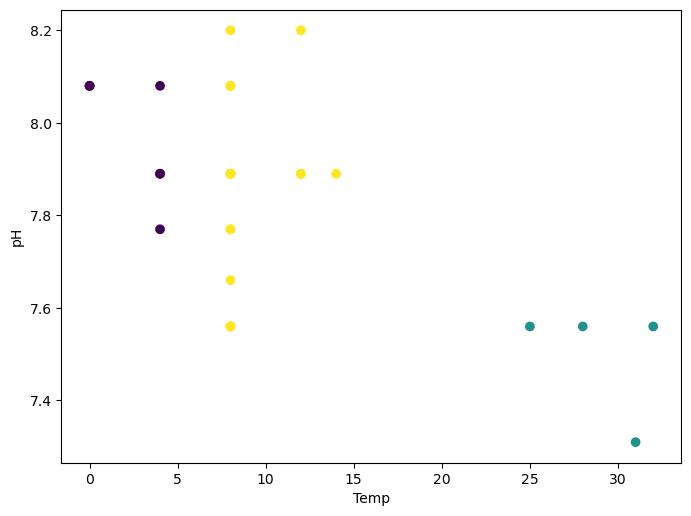

In [185]:
plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(results_df['Temp'], results_df['pH'], c=results_df['cluster'])
plt.xlabel("Temp")
plt.ylabel("pH")


Text(0, 0.5, 'Km')

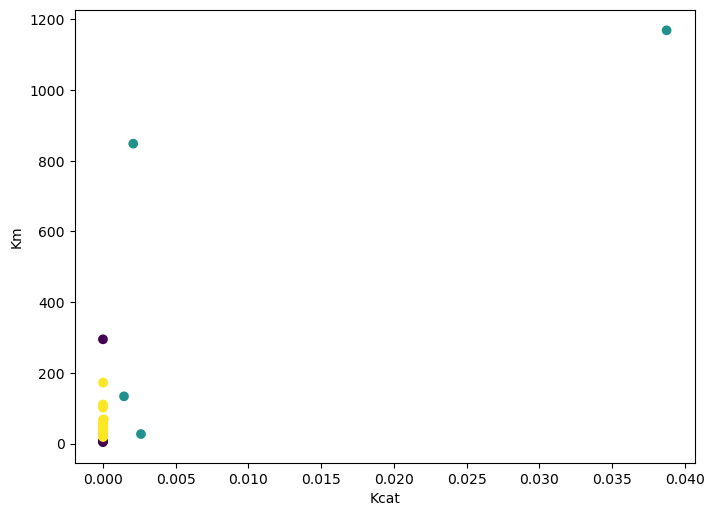

In [186]:
plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(results_df['Kcat'], results_df['Km'], c=results_df['cluster'])
plt.xlabel("Kcat")
plt.ylabel("Km")

Text(0, 0.5, 'Log Km')

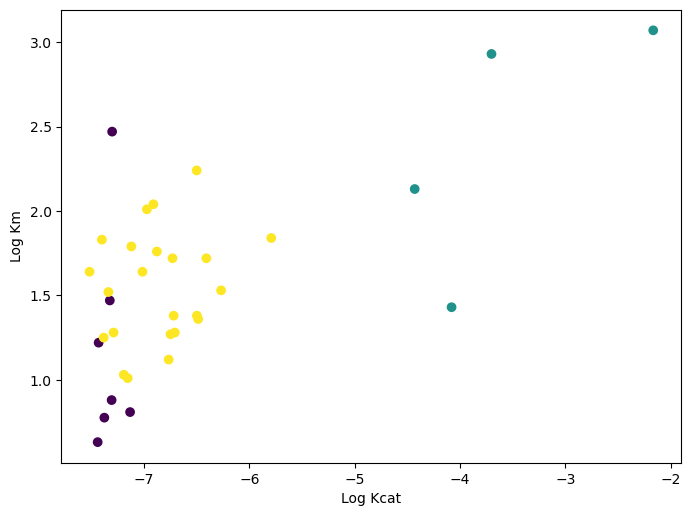

In [187]:
plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(results_df['logKcat'], results_df['logkm'], c=results_df['cluster'])
plt.xlabel("Log Kcat")
plt.ylabel("Log Km")

In [188]:
# scale temp, pH and repeat all
from sklearn.preprocessing import StandardScaler

In [189]:
# standard scaling.see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

scaled_df = pd.DataFrame(StandardScaler().fit_transform(raw_df['Temp'].to_numpy().reshape(-1,1)))
scaled_df.columns = 'Temp',
scaled_df['pH'] = StandardScaler().fit_transform(raw_df['pH'].to_numpy().reshape(-1,1))
scaled_df.head(10)

,Temp,pH
0,-0.251725,1.093302
1,-0.770431,0.209356
2,-0.770431,-0.348926
3,-0.251725,0.209356
4,-0.251725,-0.860684
5,0.266981,1.651583
6,-0.251725,0.209356
7,-0.770431,1.093302
8,-0.770431,0.209356
9,-0.251725,1.093302


,Temp,pH,Kcat,Km,Vmax,logKcat,logkm,cluster
0,-0.251725,1.093302,0.000001,44.05,0.026,-7.515843,1.64,0
1,-0.770431,0.209356,0.000001,295.10,0.022,-7.301899,2.47,1
2,-0.770431,-0.348926,0.000002,29.47,0.036,-7.323855,1.47,1
3,-0.251725,0.209356,0.000002,67.47,0.030,-7.399027,1.83,1
4,-0.251725,-0.860684,0.000003,33.15,0.056,-7.337337,1.52,1


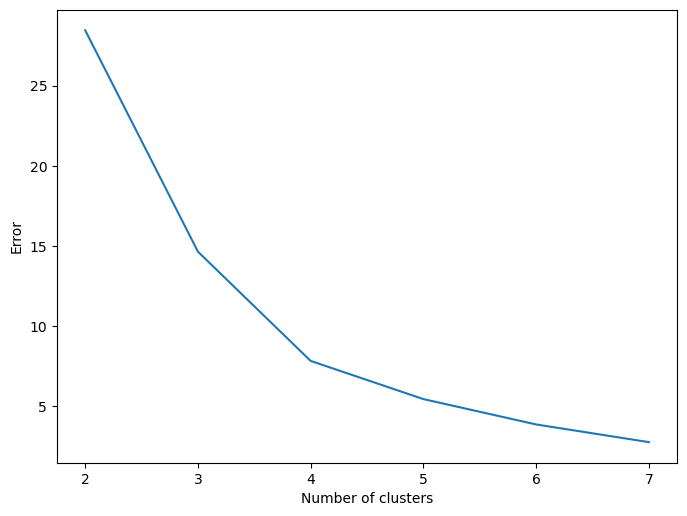

In [190]:
inertia = []
max_cluster = 8
for n in range(2,max_cluster):
    km = KMeans(n_clusters=n)
    km.fit(scaled_df)
    inertia.append(km.inertia_)
    
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(list(range(2,max_cluster)), inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Error")

n_cluster = 3
km = KMeans(n_clusters= n_cluster)
clustered = km.fit_predict(scaled_df)

clustered_df = pd.DataFrame(clustered , columns=['cluster'])
results_df = pd.concat((scaled_df, raw_df[['Kcat','Km','Vmax','logKcat','logkm']], clustered_df), axis = 1)
results_df.head()

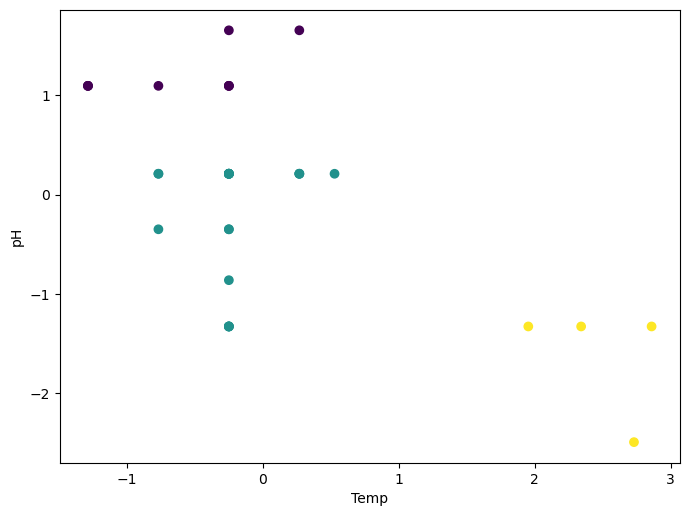

In [191]:
plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Temp")
plt.ylabel("pH")
plt.scatter(results_df['Temp'], results_df['pH'], c=results_df['cluster'])

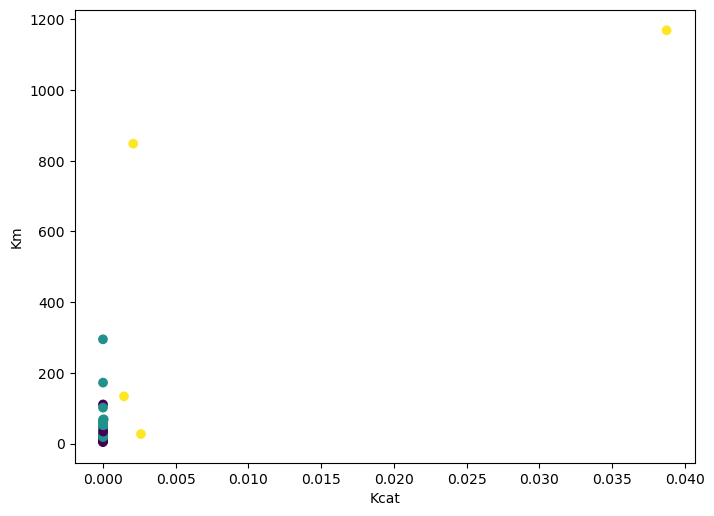

In [192]:
plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Kcat")
plt.ylabel("Km")
plt.scatter(results_df['Kcat'], results_df['Km'], c=results_df['cluster'])


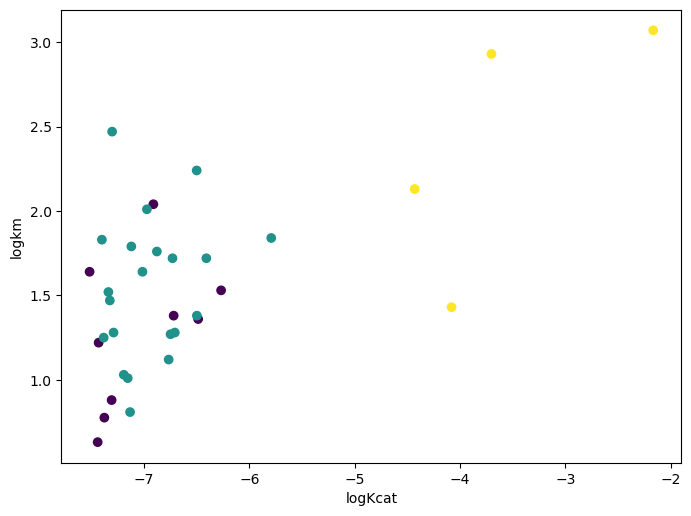

In [193]:
plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("logKcat")
plt.ylabel("logkm")
plt.scatter(results_df['logKcat'], results_df['logkm'], c=results_df['cluster'])


## Using only temperature for clustering


Here pH is excluded from the data used for clustering and the clustering process is solely based on the temperature

,Temp,pH,Kcat,Km,Vmax,logKcat,logkm,cluster
0,8,8.08,0.000001,44.05,0.026,-7.515843,1.64,0
1,4,7.89,0.000001,295.10,0.022,-7.301899,2.47,2
2,4,7.77,0.000002,29.47,0.036,-7.323855,1.47,2
3,8,7.89,0.000002,67.47,0.030,-7.399027,1.83,0
4,8,7.66,0.000003,33.15,0.056,-7.337337,1.52,0


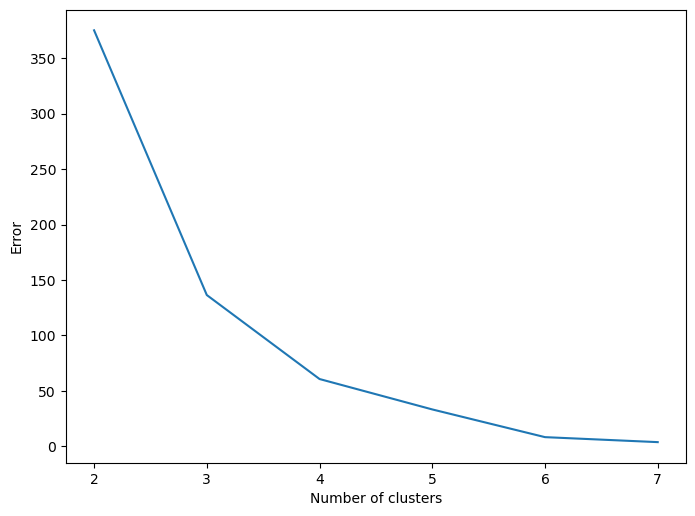

In [201]:
temp_df = raw_df[['Temp']]
inertia = []
max_cluster = 8
for n in range(2,max_cluster):
    km = KMeans(n_clusters=n)
    km.fit(temp_df)
    inertia.append(km.inertia_)
    
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(list(range(2,max_cluster)), inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Error")

n_cluster = 3
km = KMeans(n_clusters= n_cluster)
clustered = km.fit_predict(temp_df)

clustered_df = pd.DataFrame(clustered , columns=['cluster'])
# have to add pH as it's not in temp_df
results_df = pd.concat((temp_df, raw_df[['pH','Kcat','Km','Vmax','logKcat','logkm']], clustered_df), axis = 1)
results_df.head()

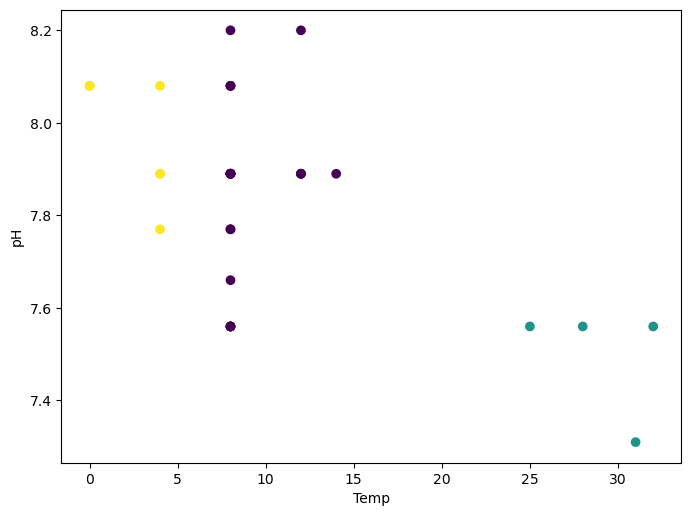

In [202]:
plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Temp")
plt.ylabel("pH")
plt.scatter(results_df['Temp'], results_df['pH'], c=results_df['cluster'])

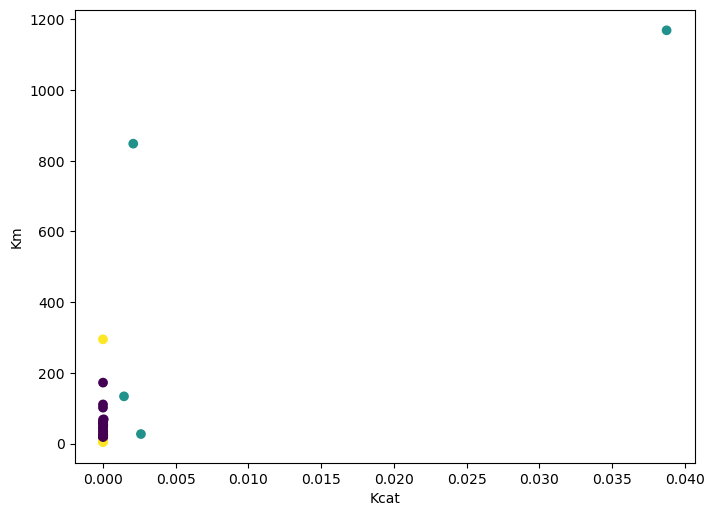

In [203]:
plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Kcat")
plt.ylabel("Km")
plt.scatter(results_df['Kcat'], results_df['Km'], c=results_df['cluster'])


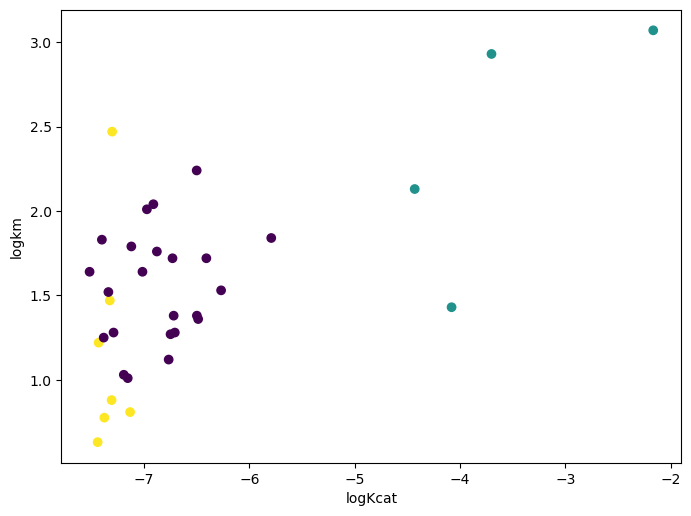

In [204]:
plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("logKcat")
plt.ylabel("logkm")
plt.scatter(results_df['logKcat'], results_df['logkm'], c=results_df['cluster'])


## Using only pH for clustering


Here temp is excluded from the data used for clustering and the clustering process is solely based on the pH

,pH,Temp,Kcat,Km,Vmax,logKcat,logkm,cluster
0,8.08,8,0.000001,44.05,0.026,-7.515843,1.64,2
1,7.89,4,0.000001,295.10,0.022,-7.301899,2.47,0
2,7.77,4,0.000002,29.47,0.036,-7.323855,1.47,0
3,7.89,8,0.000002,67.47,0.030,-7.399027,1.83,0
4,7.66,8,0.000003,33.15,0.056,-7.337337,1.52,1


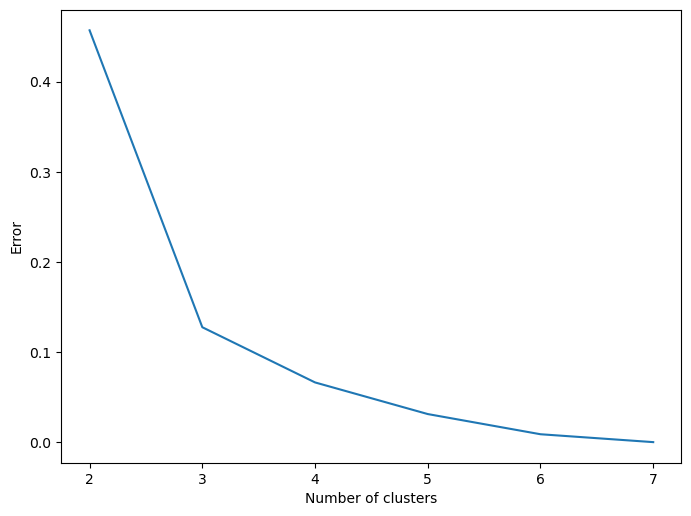

In [213]:
ph_df = raw_df[['pH']]
inertia = []
max_cluster = 8
for n in range(2,max_cluster):
    km = KMeans(n_clusters=n)
    km.fit(ph_df)
    inertia.append(km.inertia_)
    
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(list(range(2,max_cluster)), inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Error")

n_cluster = 3
km = KMeans(n_clusters= n_cluster)
clustered = km.fit_predict(ph_df)

clustered_df = pd.DataFrame(clustered , columns=['cluster'])
# have to add Temp as it's not in ph_df
results_df = pd.concat((ph_df, raw_df[['Temp','Kcat','Km','Vmax','logKcat','logkm']], clustered_df), axis = 1)
results_df.head()

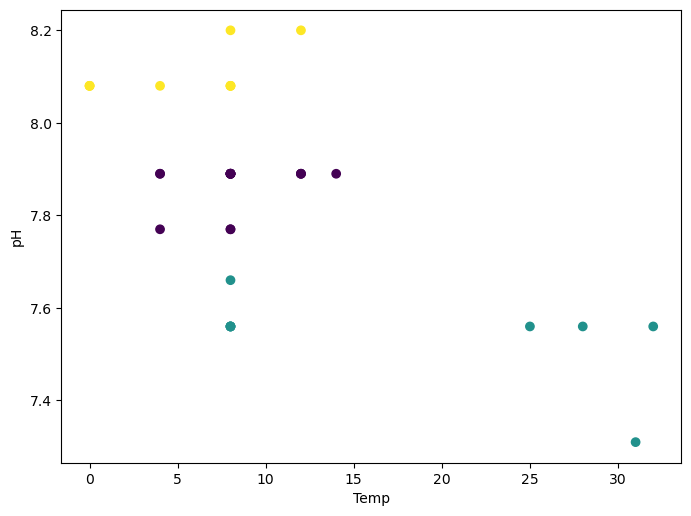

In [214]:
plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Temp")
plt.ylabel("pH")
plt.scatter(results_df['Temp'], results_df['pH'], c=results_df['cluster'])

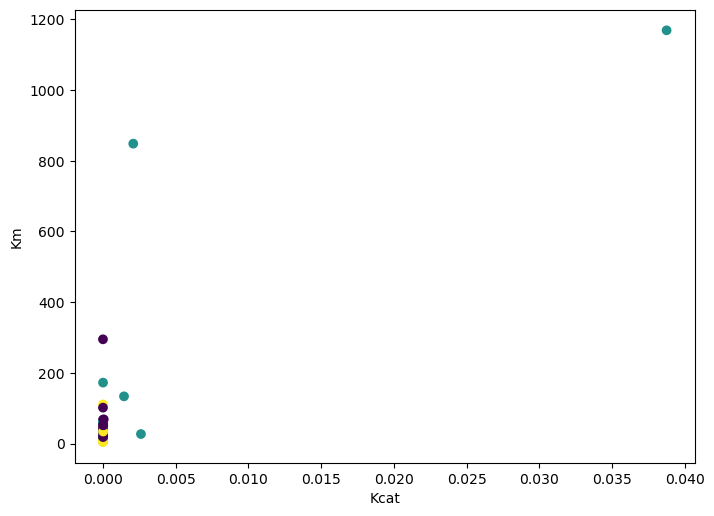

In [215]:
plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("Kcat")
plt.ylabel("Km")
plt.scatter(results_df['Kcat'], results_df['Km'], c=results_df['cluster'])


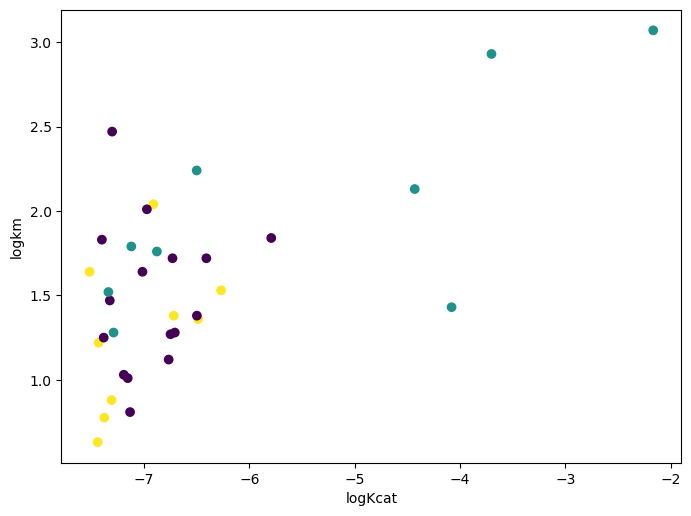

In [216]:
plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel("logKcat")
plt.ylabel("logkm")
plt.scatter(results_df['logKcat'], results_df['logkm'], c=results_df['cluster'])
